In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy

=== Метод наискорейшего спуска ===
eps =  0.001
x* =  -6.362727716752402 40.48997070315089
f(x*) =  54.21297058629429
iterations =  51
calculationsF =  1224
calculationsDF =  102


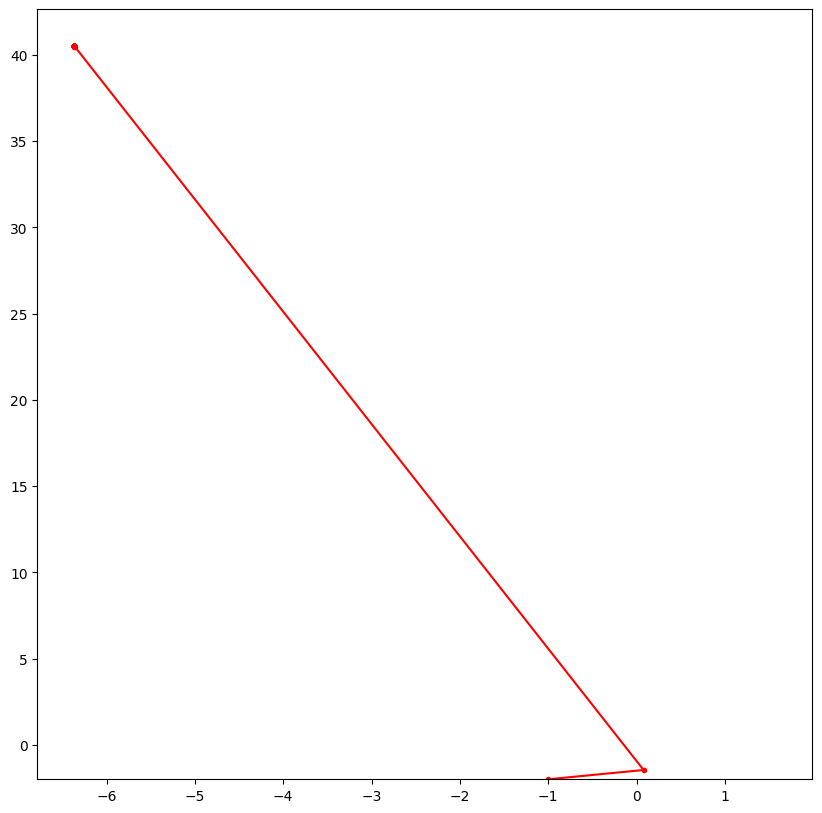

In [ ]:
F = lambda x, y: alpha * (x**2 - y)** 2 + (x-1) ** 2
X = np.array([-1, -2])
eps = 1e-3

alpha = 100
kappa = 1
iterations = 0
calculationsF = 0
calculationsDF = 0
# градиент
x_, y_ = sympy.Symbol('x'), sympy.Symbol('y')
grad_F = sympy.tensor.array.derive_by_array(F(x_, y_), (x_, y_))
grad_F = sympy.lambdify((x_, y_), grad_F, 'numpy')

#золотое сечение
def gold_ratio(f, b, calculationsF, a = 0, e = eps * 1e-1):
    t = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Bk - (Bk - Ak) / t
    Xk2 = Ak + (Bk - Ak) / t
    y1, y2 = f(Xk1), f(Xk2)
    calculationsF += 2
    while lk >= e:
        if y1 >= y2:
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = f(Xk2)
        else:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = f(Xk1)
        lk = Bk - Ak
        calculationsF += 1
    return (Ak + Bk) / 2, calculationsF

X_line = np.array([X[0]])
Y_line = np.array([X[1]])
def G(X):
  return 3*X[0]**2/4 + 5*X[0]/4-2-X[1]
f = lambda X: F(X[0], X[1]) - 25 /G(X)
w = lambda X: -np.array(grad_F(X[0], X[1]))

data = [f(X)]
#метод наискорейшего спуска
while (np.linalg.norm(w(X)) > eps):
  wk = w(X)
  phi = lambda kappa_: f(X + kappa_ * wk)
  kappa, calculationsF = gold_ratio(phi, 2.5, calculationsF)
  X = X + kappa * wk
  X_line = np.append(X_line, X[0])
  Y_line = np.append(Y_line, X[1])
  data.append(f(X))
  iterations += 1
  calculationsDF += 2
  if iterations > 50:
    break
# визуализации
x_space = np.arange(-2, 2, 0.01)
y_space = np.arange(-2, 2, 0.01)
xgrid, ygrid = np.meshgrid(x_space, y_space)
z = (xgrid**2-ygrid)**2+(xgrid-1)**2



fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot()
axes.contour(xgrid, ygrid, z, data[::-1])
plt.plot(X_line, Y_line, color = "r", marker = ".")

print("=== Метод наискорейшего спуска ===")
print("eps = ", eps)
print("x* = ", X[0], X[1])
print("f(x*) = ", F(X[0], X[1]))
print("iterations = ", iterations)
print("calculationsF = ", calculationsF)
print("calculationsDF = ", calculationsDF)
plt.show()






=== Метод дробления шага ===
eps =  0.001
x* =  0.9991063498842844 0.9977685681852537
f(x*) =  9.965734067129652e-07
iterations =  63
calculations_F =  207
calculations_dF =  126


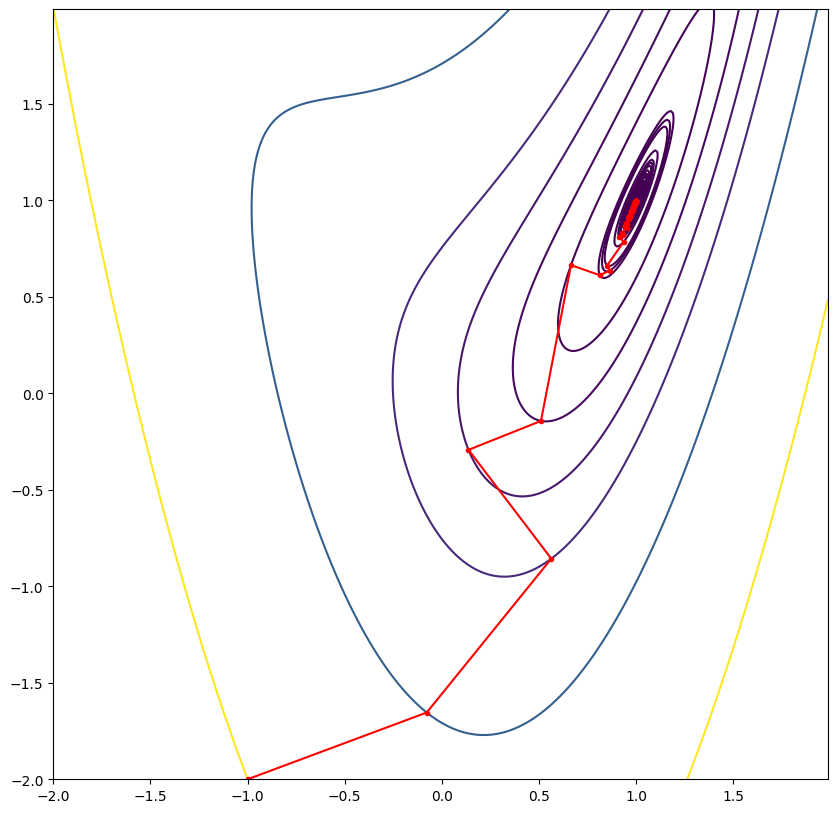

In [ ]:
#Метод дробления шага
alpha = 1
F = lambda x, y: alpha * (x**2 - y)** 2 + (x-1) ** 2
X = np.array([-1, -2])
eps = 1e-3
v, g = 0.3, 0.49

kappa = 1
iterations = 0
calculations_F = 0
calculations_dF = 0

# градиент
x_, y_ = sympy.Symbol('x'), sympy.Symbol('y')
grad_F = sympy.tensor.array.derive_by_array(F(x_, y_), (x_, y_))
grad_F = sympy.lambdify((x_, y_), grad_F, 'numpy')

X_line = np.array([X[0]])
Y_line = np.array([X[1]])

f = lambda X: F(X[0], X[1])
w = lambda X: -np.array(grad_F(X[0], X[1]))

data = [f(X)]

while (np.linalg.norm(w(X)) > eps):
  kappa = 1
  wk = w(X)
  U = f(X)
  X_n = X + kappa * wk
  delta = U - f(X_n)
  while delta < v * kappa * (np.linalg.norm(wk)**2):
    kappa = kappa * g
    X_n = X + kappa * wk
    delta = U - f(X_n)
    calculations_F += 1
  X = X_n
  X_line = np.append(X_line, X[0])
  Y_line = np.append(Y_line, X[1])
  data.append(f(X))
  iterations += 1
  calculations_F += 1
  calculations_dF += 2

# визуализации
x_space = np.arange(-2, 2, 0.01)
y_space = np.arange(-2, 2, 0.01)
xgrid, ygrid = np.meshgrid(x_space, y_space)
z = (xgrid**2-ygrid)**2+(xgrid-1)**2

fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot()
axes.contour(xgrid, ygrid, z, data[::-1])
plt.plot(X_line, Y_line, color = "r", marker = ".")

print("=== Метод дробления шага ===")
print("eps = ", eps)
print("x* = ", X[0], X[1])
print("f(x*) = ", F(X[0], X[1]))
print("iterations = ", iterations)
print("calculations_F = ", calculations_F)
print("calculations_dF = ", calculations_dF)
plt.show()